In [1]:
# Dependencies and Setup
import hvplot.pandas
import holoviews
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
import csv
import mplcursors

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import API key 
from api_keys import geoapify_key

# Stretch Jupyter to a greater width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [ ]:
# Read in Happiness dataset and Cost of living dataset
hap_df = pd.read_csv('./Resources/2022.csv')
hap_df = hap_df[['Country', 'Happiness score']]
hap_df.columns = ['Country', 'Happiness Score']
cost_df = pd.read_csv('./Resources/Cost_of_Living_Index_2022.csv')
cost_df = cost_df[['Country', 'Local Purchasing Power Index', 'Cost of Living Index']]

print(hap_df.head())
cost_df.head()

In [ ]:
# Merging happiness and cost of living dataframes
HappinessCostOfLiving_df = hap_df.merge(cost_df, how='inner', on='Country')
HappinessCostOfLiving_df.head()

In [ ]:
# Country Count
HappinessCostOfLiving_df.count()

In [ ]:
# Read in Country and Capital dataset to get longitude and latitude
capCoord_df = pd.read_csv('./Resources/country-capitals.csv', on_bad_lines='skip')
print(capCoord_df.columns)
del capCoord_df['CountryCode']
del capCoord_df['ContinentName']
capCoord_df.columns = ['Country', 'Capital', 'Latitude', 'Longitude']
print(capCoord_df.columns)

capCoord_df.head()

In [ ]:
# Merge long and latitude to HappinessCostOfLiving_df
HappinessCostOfLiving_df = HappinessCostOfLiving_df.merge(capCoord_df, how='inner', on='Country')
HappinessCostOfLiving_df.head()

In [ ]:
# Change Happiness Score from object to float
HappinessCostOfLiving_df['Happiness Score'] = HappinessCostOfLiving_df['Happiness Score'].str.replace(",", "").astype('float')
HappinessCostOfLiving_df.dtypes


In [ ]:
# Sort Countries by "Country"
srt_df= HappinessCostOfLiving_df.sort_values(by='Country')
print(HappinessCostOfLiving_df.count())
srt_df.head()

In [ ]:
# Save dataFrame to csv
HappinessCostOfLiving_df.to_csv('./Output/CSVSavePoint/HappinessCostOfLiving_df.csv')

In [ ]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLiving_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLiving_df.csv')
HappinessCostOfLiving_df_str = "HappinessCostOfLiving_df1"

In [ ]:
# Plot Countries from HappinessCostOfLiving_df on global map
happiestplot = HappinessCostOfLiving_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.1,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
holoviews.renderer('bokeh').save(happiestplot, f'./Output/map_all_cities_in_{HappinessCostOfLiving_df_str}', fmt='png')

happiestplot

In [ ]:
# Get top 20 happiest countries
top20Happiness_df = HappinessCostOfLiving_df.sort_values('Happiness Score', ascending=False).head(20)
top20Happiness_df_str = "top20Happiness_df2"
top20Happiness_df

In [ ]:
# Plot all countries in top20Happiness_df
top20HappinessPlot = top20Happiness_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.15,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
holoviews.renderer('bokeh').save(top20HappinessPlot, f'./Output/map_all_cities_in_{top20Happiness_df_str}', fmt='png')

top20HappinessPlot

In [ ]:
# Get top 20 least happy countries
bottom20Hap = HappinessCostOfLiving_df.sort_values('Happiness Score').head(20)
bottom20Hap_str = 'bottom20Hap3'
bottom20Hap

In [ ]:
# Plot all countries in top20Happiness_df
bottom20HapPlot = bottom20Hap.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.3,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
holoviews.renderer('bokeh').save(bottom20HapPlot, f'./Output/map_all_cities_in_{bottom20Hap_str}', fmt='png')

bottom20HapPlot

In [ ]:
# Display count of HappinessCostOfLiving_df
HappinessCostOfLiving_df.count()

In [ ]:
# Create crime_df
crime_df = pd.read_csv('./Resources/WorldCrimeIndex.csv', encoding='utf-8')

crime_df.head()

In [ ]:
# Separate country from city
df = crime_df['City'].str.split(", ", expand=True)
# crime_df.rename(columns={'City':"Country"})
df.head()

In [ ]:
# Add and fill country column to crime_df
crime_df['Country'] = df[1]

# Delete city column
del crime_df['City']
crime_df = crime_df.groupby('Country').mean()
crime_df.head(30)

In [ ]:
# Merge HappinessCostOfLiving_df with crime_df
HappinessCostOfLivingCrime_df = HappinessCostOfLiving_df.copy().merge(crime_df, how='inner', on='Country')
print(HappinessCostOfLivingCrime_df.count())
HappinessCostOfLivingCrime_df.head()


In [ ]:
# Drop rows that contained NAN
print(HappinessCostOfLivingCrime_df.count())
no_na_df = HappinessCostOfLivingCrime_df.dropna()
no_na_df.count()

In [ ]:
# Save dataFrame to csv
HappinessCostOfLivingCrime_df.to_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_df.csv')

In [2]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLivingCrime_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_df.csv')

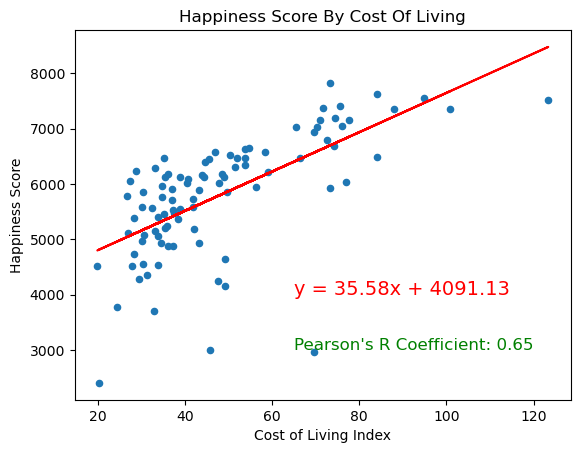

In [3]:
# Find linear regression parameters Cost of Living Index by Happiness Score
(m, y, r, p, std) = linregress(HappinessCostOfLivingCrime_df['Cost of Living Index'], HappinessCostOfLivingCrime_df['Happiness Score'])

# Calculate values for linear regression line
yregressLin = m * HappinessCostOfLivingCrime_df['Cost of Living Index'] + y

# Plot HappinessCostOfLivingCrime_df
HappinessCostOfLivingCrime_df.plot(kind='scatter', x = 'Cost of Living Index', y = 'Happiness Score')

# Create annotation text
equation = f"y = {m:.2f}x + {y:.2f}"

# Plot linear regression line
plt.plot(HappinessCostOfLivingCrime_df['Cost of Living Index'], yregressLin, color='red')
plt.annotate(equation, (65, 4000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (65, 3000), color='green', size = 12)
plt.title('Happiness Score By Cost Of Living')
fig = plt.gcf()
plt.show()

In [4]:
# Create png name
figureTitle = 'HappinessCostLiving4'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")


Pearson's R Coefficient: 0.4386302852303171


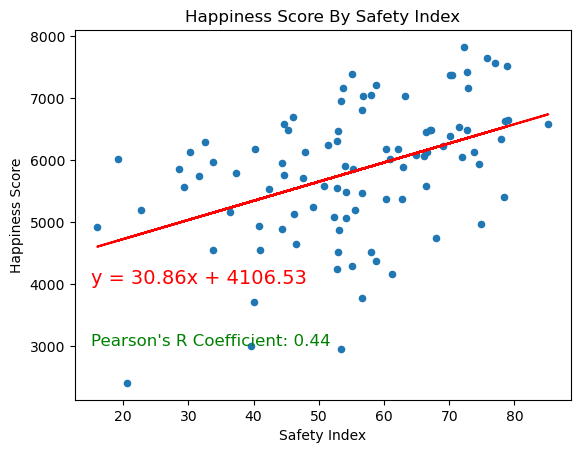

In [5]:
# Find linear regression parameters Safety Index by Happiness Score
(m, y, r, p, std) = linregress(HappinessCostOfLivingCrime_df['Safety Index'], HappinessCostOfLivingCrime_df['Happiness Score'])

# Calculate values for linear regression line
yregressLin = m * HappinessCostOfLivingCrime_df['Safety Index'] + y

# Plot HappinessCostOfLivingCrime_df
HappinessCostOfLivingCrime_df.plot(kind='scatter', x = 'Safety Index', y = 'Happiness Score')

# Create annotation text
equation = f"y = {m:.2f}x + {y:.2f}"

# Plot linear regression line
print(f"Pearson's R Coefficient: {r}")
plt.plot(HappinessCostOfLivingCrime_df['Safety Index'], yregressLin, color='red')
plt.annotate(equation, (15, 4000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (15, 3000), color='green', size = 12)
plt.title('Happiness Score By Safety Index')
fig = plt.gcf()
plt.show()

In [6]:
# Create png name
figureTitle = 'HappinessSafety5'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")

Pearson's R Coefficient: 0.7221735991986103


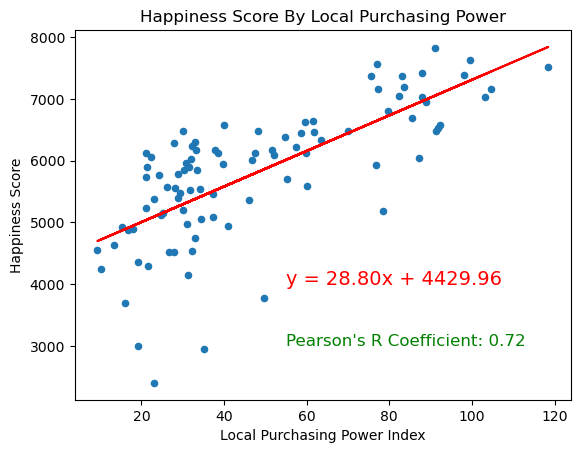

In [7]:
# Find linear regression parameters Local Purchasing Power Index by Happiness Score
(m, y, r, p, std) = linregress(HappinessCostOfLivingCrime_df['Local Purchasing Power Index'], HappinessCostOfLivingCrime_df['Happiness Score'])

# Calculate values for linear regression line
yregressLin = m * HappinessCostOfLivingCrime_df['Local Purchasing Power Index'] + y

# Plot HappinessCostOfLivingCrime_df
HappinessCostOfLivingCrime_df.plot(kind='scatter', x = 'Local Purchasing Power Index', y = 'Happiness Score')

# Create annotation text
equation = f"y = {m:.2f}x + {y:.2f}"

# Plot linear regression line
print(f"Pearson's R Coefficient: {r}")
plt.plot(HappinessCostOfLivingCrime_df['Local Purchasing Power Index'], yregressLin, color='red')
plt.annotate(equation, (55, 4000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (55, 3000), color='green', size = 12)
plt.title('Happiness Score By Local Purchasing Power')
fig = plt.gcf()
plt.show()

In [8]:
# Create png name
figureTitle = 'HappinessPurchasing6'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")


<IPython.core.display.Javascript object>


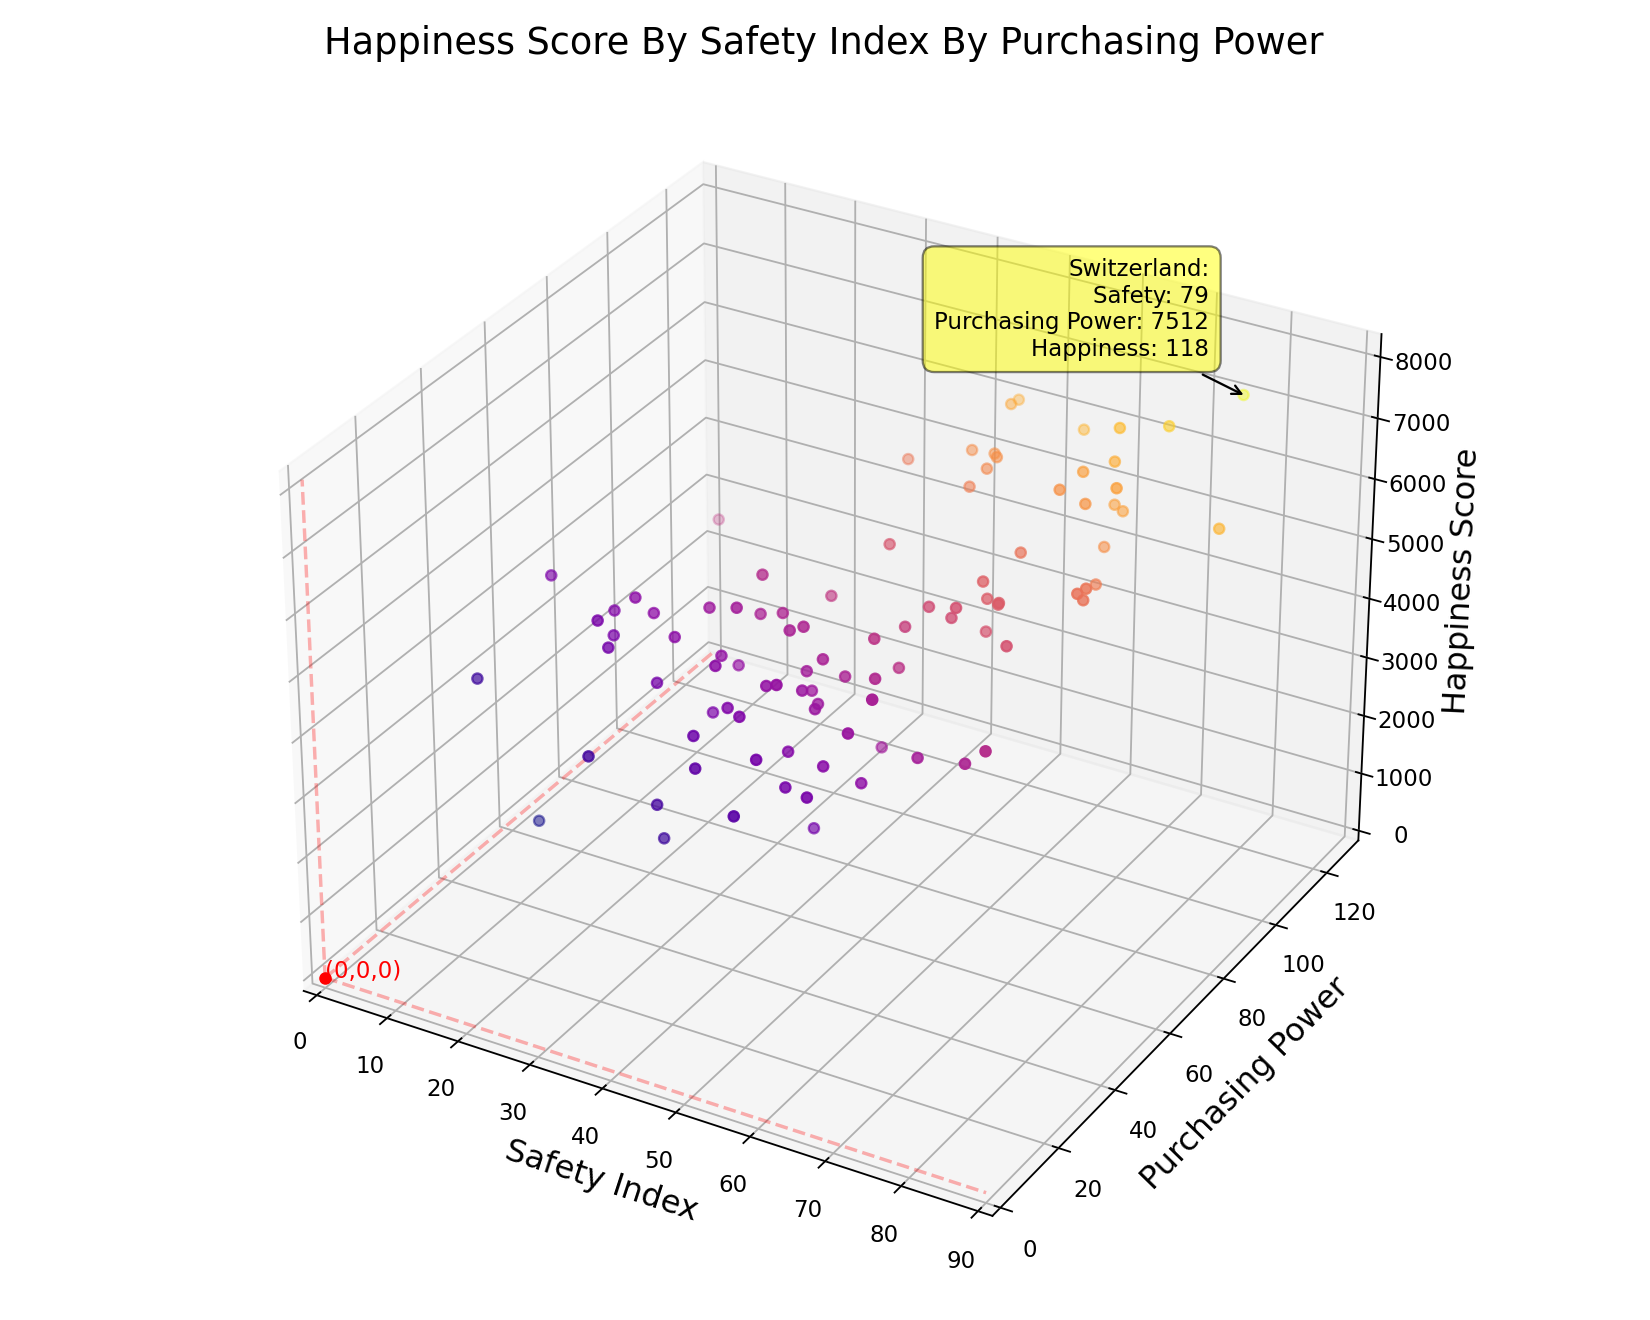

In [19]:
%matplotlib notebook

# Plot Happiness by Local Purchasing Power Index by Safety Index
fig = plt.figure(figsize=(10,8), tight_layout=True)
ax = fig.add_subplot(projection='3d')
x = HappinessCostOfLivingCrime_df['Safety Index']
xlabel = 'Safety Index'
y = HappinessCostOfLivingCrime_df['Local Purchasing Power Index']
ylabel = 'Purchasing Power'
z = HappinessCostOfLivingCrime_df['Happiness Score']
zlabel = 'Happiness Score'
colors = np.random.rand(367)
# bin = [3000, 3500, 4000, 4500, 5000 ]
topHap = HappinessCostOfLivingCrime_df['Happiness Score'].sort_values(ascending=False).head(1).values[0]
topPurch = HappinessCostOfLivingCrime_df['Local Purchasing Power Index'].sort_values(ascending=False).head(1).values[0]
topSafety = HappinessCostOfLivingCrime_df['Safety Index'].sort_values(ascending=False).head(1).values[0]
red = HappinessCostOfLivingCrime_df['Happiness Score']/topHap
green = HappinessCostOfLivingCrime_df['Local Purchasing Power Index']/topSafety
blue = HappinessCostOfLivingCrime_df['Safety Index']/topPurch 
triple = (red+ green+blue)/3


xmin = 0
xmax = 90
ymin = 0
ymax = 130
zmin = 0
zmax = 8200

ax.scatter(x, y, z, cmap='plasma', c=triple)# xlabel=xlabel, ylabel=ylabel)
ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)
ax.set_zlabel(zlabel, fontsize=14)
plt.subplots_adjust(right=0.5, bottom=0.5)
plt.title('Happiness Score By Safety Index By Purchasing Power', fontsize=16)

# Show origin
ax.scatter3D(0,0,0, color = 'red')
ax.text(0.01,0.01,0, '(0,0,0)', color = 'red')
xmin = 0
xmax = 90
ymin = 0
ymax = 130
zmin = 0
zmax = 8200
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_zlim(zmin,zmax)
plt.plot([xmin, xmax],(0,0),(0,0), color='red', linestyle='dashed', alpha=0.3)
plt.plot((0,0),[ymin, ymax],(0,0), color='red', linestyle='dashed', alpha=0.3)
plt.plot((0,0),(0,0),[zmin, zmax], color='red', linestyle='dashed', alpha=0.3)

# Hover cursor
country = HappinessCostOfLivingCrime_df['Country']
safety = x
happiness = y
purchasingPower = z
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set(text = 
    f"{country[sel.target.index]}:\nSafety: {safety[sel.target.index]:.0f}\nPurchasing Power: {purchasingPower[sel.target.index]:.0f}\nHappiness: {happiness[sel.target.index]:.0f}"))

fig1 = plt.gcf()
plt.show()

In [20]:
# Create png name
figureTitle = 'HappinessPurchSafety3D7'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [21]:
# Find minimum values for Happiness Score, Local Purchasing Power Index, and Safety Index  
bottomHap = HappinessCostOfLivingCrime_df['Happiness Score'].min()
bottomPurch = HappinessCostOfLivingCrime_df['Local Purchasing Power Index'].min()
bottompSafety = HappinessCostOfLivingCrime_df['Safety Index'].min()

# Find maximum values for Happiness Score, Local Purchasing Power Index, and Safety Index  
topHap = HappinessCostOfLivingCrime_df['Happiness Score'].max()
topPurch = HappinessCostOfLivingCrime_df['Local Purchasing Power Index'].max()
topSafety = HappinessCostOfLivingCrime_df['Safety Index'].max()

# Create columns for normalized values for Happiness Score, Local Purchasing Power Index, and Safety Index  
HappinessCostOfLivingCrime_df['Normalized Happiness'] = (HappinessCostOfLivingCrime_df['Happiness Score'] - bottomHap) / (topHap - bottomHap)
HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] = (HappinessCostOfLivingCrime_df['Local Purchasing Power Index'] - bottomPurch) / (topPurch - bottomPurch)
HappinessCostOfLivingCrime_df['Normalized Safety'] = (HappinessCostOfLivingCrime_df['Safety Index'] - bottompSafety) / (topSafety - bottompSafety)
HappinessCostOfLivingCrime_df.head()


,Unnamed: 0.1,Unnamed: 0,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Rank,Crime Index,Safety Index,Normalized Happiness,Normalized Local Purchasing Power,Normalized Safety
0,0,0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,380.333333,27.763333,72.236667,1.000000,0.748671,0.812908
1,1,1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,411.000000,24.270000,75.730000,0.965848,0.825940,0.863423
2,2,2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,421.000000,23.020000,76.980000,0.951265,0.620715,0.881498
3,3,3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,427.833333,21.156667,78.843333,0.942957,1.000000,0.908442
4,4,4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,385.500000,27.235000,72.765000,0.925051,0.720898,0.820548


<IPython.core.display.Javascript object>


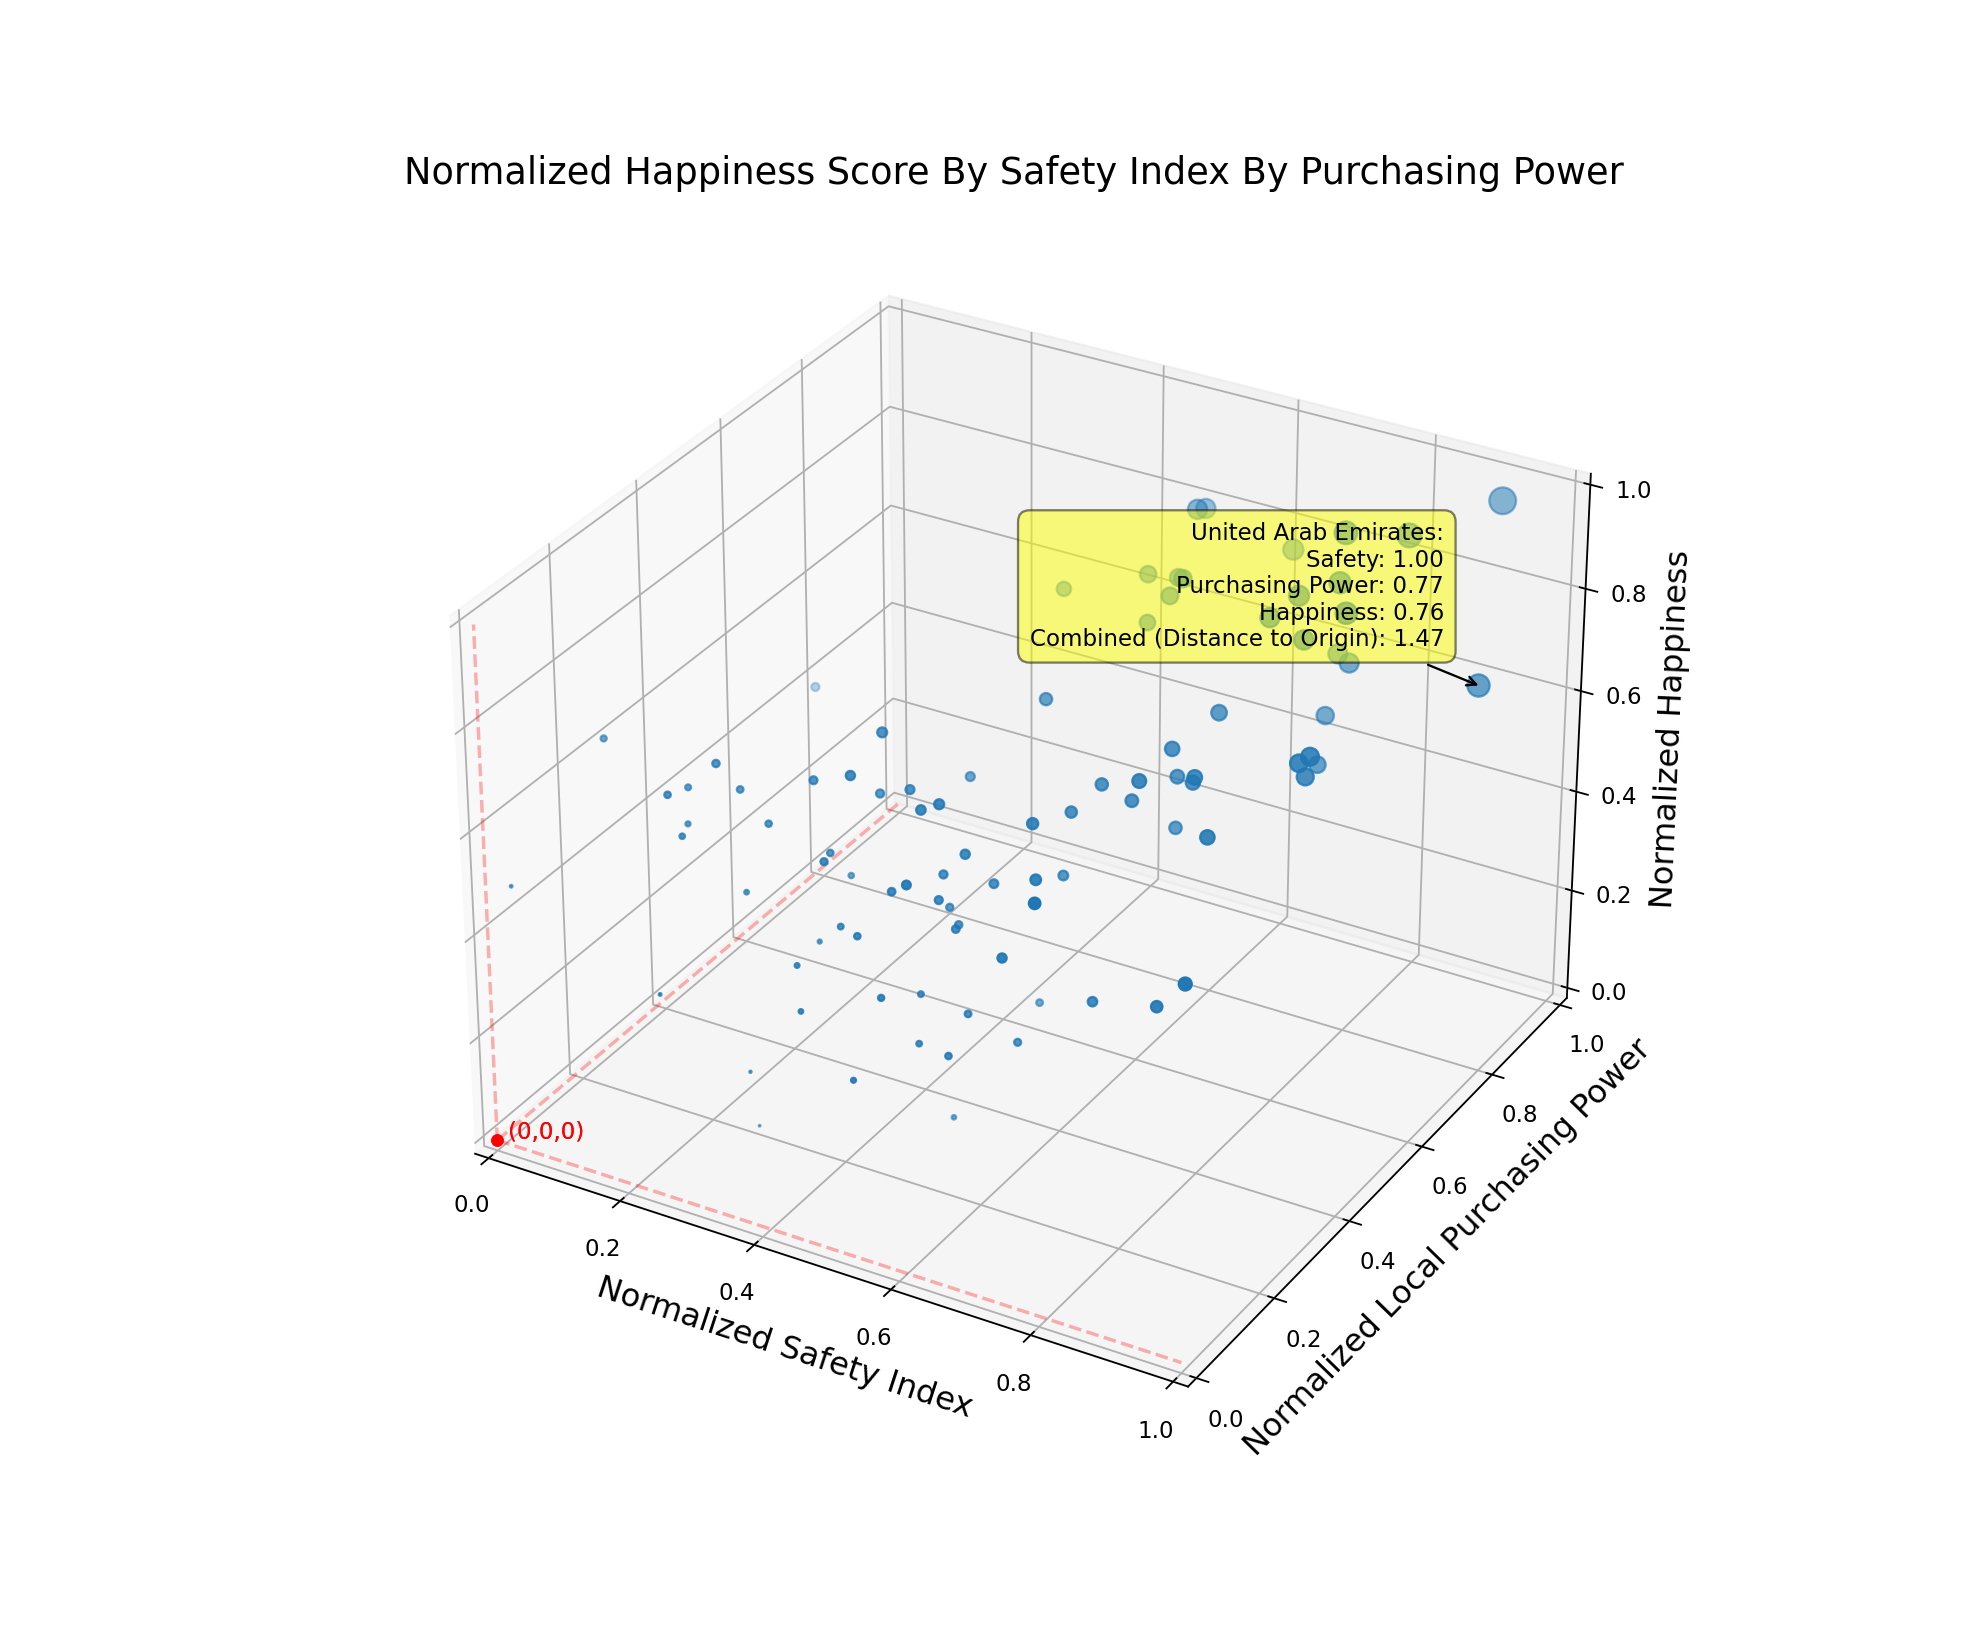

In [52]:
%matplotlib notebook

# Create weights for combining normalized Happiness Score, Local Purchasing Power Index, and Safety Index into a single value
weightHap = 1
weightPurch = 1
weightSafety = 1

# Create a new column by combining the three metrics (Normalized Happiness, Safety, Purchasing Power) into one metric
HappinessCostOfLivingCrime_df['Equally Weighted Safety, Purchasing, and Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] * weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] * weightHap)**2)

# Plot normalized-combined metric 'Equally Weighted Safety, Purchasing, and Happiness'
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# print(HappinessCostOfLivingCrime_df)
# Find min
minimumEquallyWeighted = HappinessCostOfLivingCrime_df['Equally Weighted Safety, Purchasing, and Happiness'].min()

visualFactor = 40
x = HappinessCostOfLivingCrime_df['Normalized Safety']
y = HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power']
z = HappinessCostOfLivingCrime_df['Normalized Happiness']
size = HappinessCostOfLivingCrime_df['Equally Weighted Safety, Purchasing, and Happiness']

# Size of datapoint will increase with distance from origin (0,0,0)
fg = ax.scatter3D(x, y, z, 
                  s = visualFactor * (size - minimumEquallyWeighted)**3,
                  cmap='plasma'
                  )

# Labels
ax.set_title('Normalized Happiness Score By Safety Index By Purchasing Power', fontsize=16)
ax.scatter3D(0,0,0, color = 'red')
ax.text(0.01,0.01,0, '(0,0,0)', color = 'red')
ax.set_xlabel('Normalized Safety Index', fontsize=14)
ax.set_ylabel('Normalized Local Purchasing Power', fontsize=14)
ax.set_zlabel('Normalized Happiness', fontsize=14)


# Show origin
ax.scatter3D(0,0,0, color = 'red')
ax.text(0.01,0.01,0, '(0,0,0)', color = 'red')
xmin = 0
xmax = 1
ymin = 0
ymax = 1
zmin = 0
zmax = 1
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_zlim(zmin,zmax)
plt.plot([xmin, xmax],(0,0),(0,0), color='red', linestyle='dashed', alpha=0.3)
plt.plot((0,0),[ymin, ymax],(0,0), color='red', linestyle='dashed', alpha=0.3)
plt.plot((0,0),(0,0),[zmin, zmax], color='red', linestyle='dashed', alpha=0.3)

# Hover cursor
labels = HappinessCostOfLivingCrime_df['Country']
country = HappinessCostOfLivingCrime_df['Country']
safety = x
happiness = y
purchasingPower = z
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set(text = 
    f"{country[sel.target.index]}:\nSafety: {safety[sel.target.index]:.2f}\nPurchasing Power: {purchasingPower[sel.target.index]:.2f}\nHappiness: {happiness[sel.target.index]:.2f}\nCombined (Distance to Origin): {size[sel.target.index]:.2f}"))

fig1 = plt.gcf()
plt.show()

In [53]:
# Create png name
figureTitle = 'NormalizedHappinessPurchSafety3D8'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [54]:
# Save dataFrame to csv
HappinessCostOfLivingCrime_df.to_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfNorm.csv')

In [55]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLivingCrime_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfNorm.csv')

In [56]:
# Calculate and create columns for Z-scores of Happiness Score, Local Purchasing Power Index, and Safety Index
from scipy.stats import zscore
HappinessCostOfLivingCrime_df['Z-Score Happiness Score'] = zscore(HappinessCostOfLivingCrime_df['Happiness Score'])
HappinessCostOfLivingCrime_df['Z-Score Safety Index'] = zscore(HappinessCostOfLivingCrime_df['Safety Index'])
HappinessCostOfLivingCrime_df['Z-Score Local Purchasing Power'] = zscore(HappinessCostOfLivingCrime_df['Local Purchasing Power Index'])
HappinessCostOfLivingCrime_df.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,...,Crime Index,Safety Index,Normalized Happiness,Normalized Local Purchasing Power,Normalized Safety,"Equally Weighted Safety, Purchasing, and Happiness",Z-Score Happiness Score,Z-Score Safety Index,Z-Score Local Purchasing Power,"Equally Weighted Z-Score Safety, Purchasing, and Happiness"
0,0,0,0,0,0,Finland,7821.0,91.02,73.20,Helsinki,...,27.763333,72.236667,1.000000,0.748671,0.812908,1.490412,1.878166,1.117736,1.605072,2.711660
1,1,1,1,1,1,Denmark,7636.0,99.45,84.12,Copenhagen,...,24.270000,75.730000,0.965848,0.825940,0.863423,1.536404,1.705324,1.347331,1.919171,2.899422
2,2,2,2,2,2,Iceland,7557.0,77.06,94.86,Reykjavik,...,23.020000,76.980000,0.951265,0.620715,0.881498,1.437787,1.631516,1.429486,1.084926,2.425353
3,3,3,3,3,3,Switzerland,7512.0,118.44,123.35,Bern,...,21.156667,78.843333,0.942957,1.000000,0.908442,1.647555,1.589473,1.551951,2.626732,3.440160
4,4,4,4,4,4,Netherlands,7415.0,87.99,75.66,Amsterdam,...,27.235000,72.765000,0.925051,0.720898,0.820548,1.431332,1.498848,1.152460,1.492175,2.408588


<IPython.core.display.Javascript object>


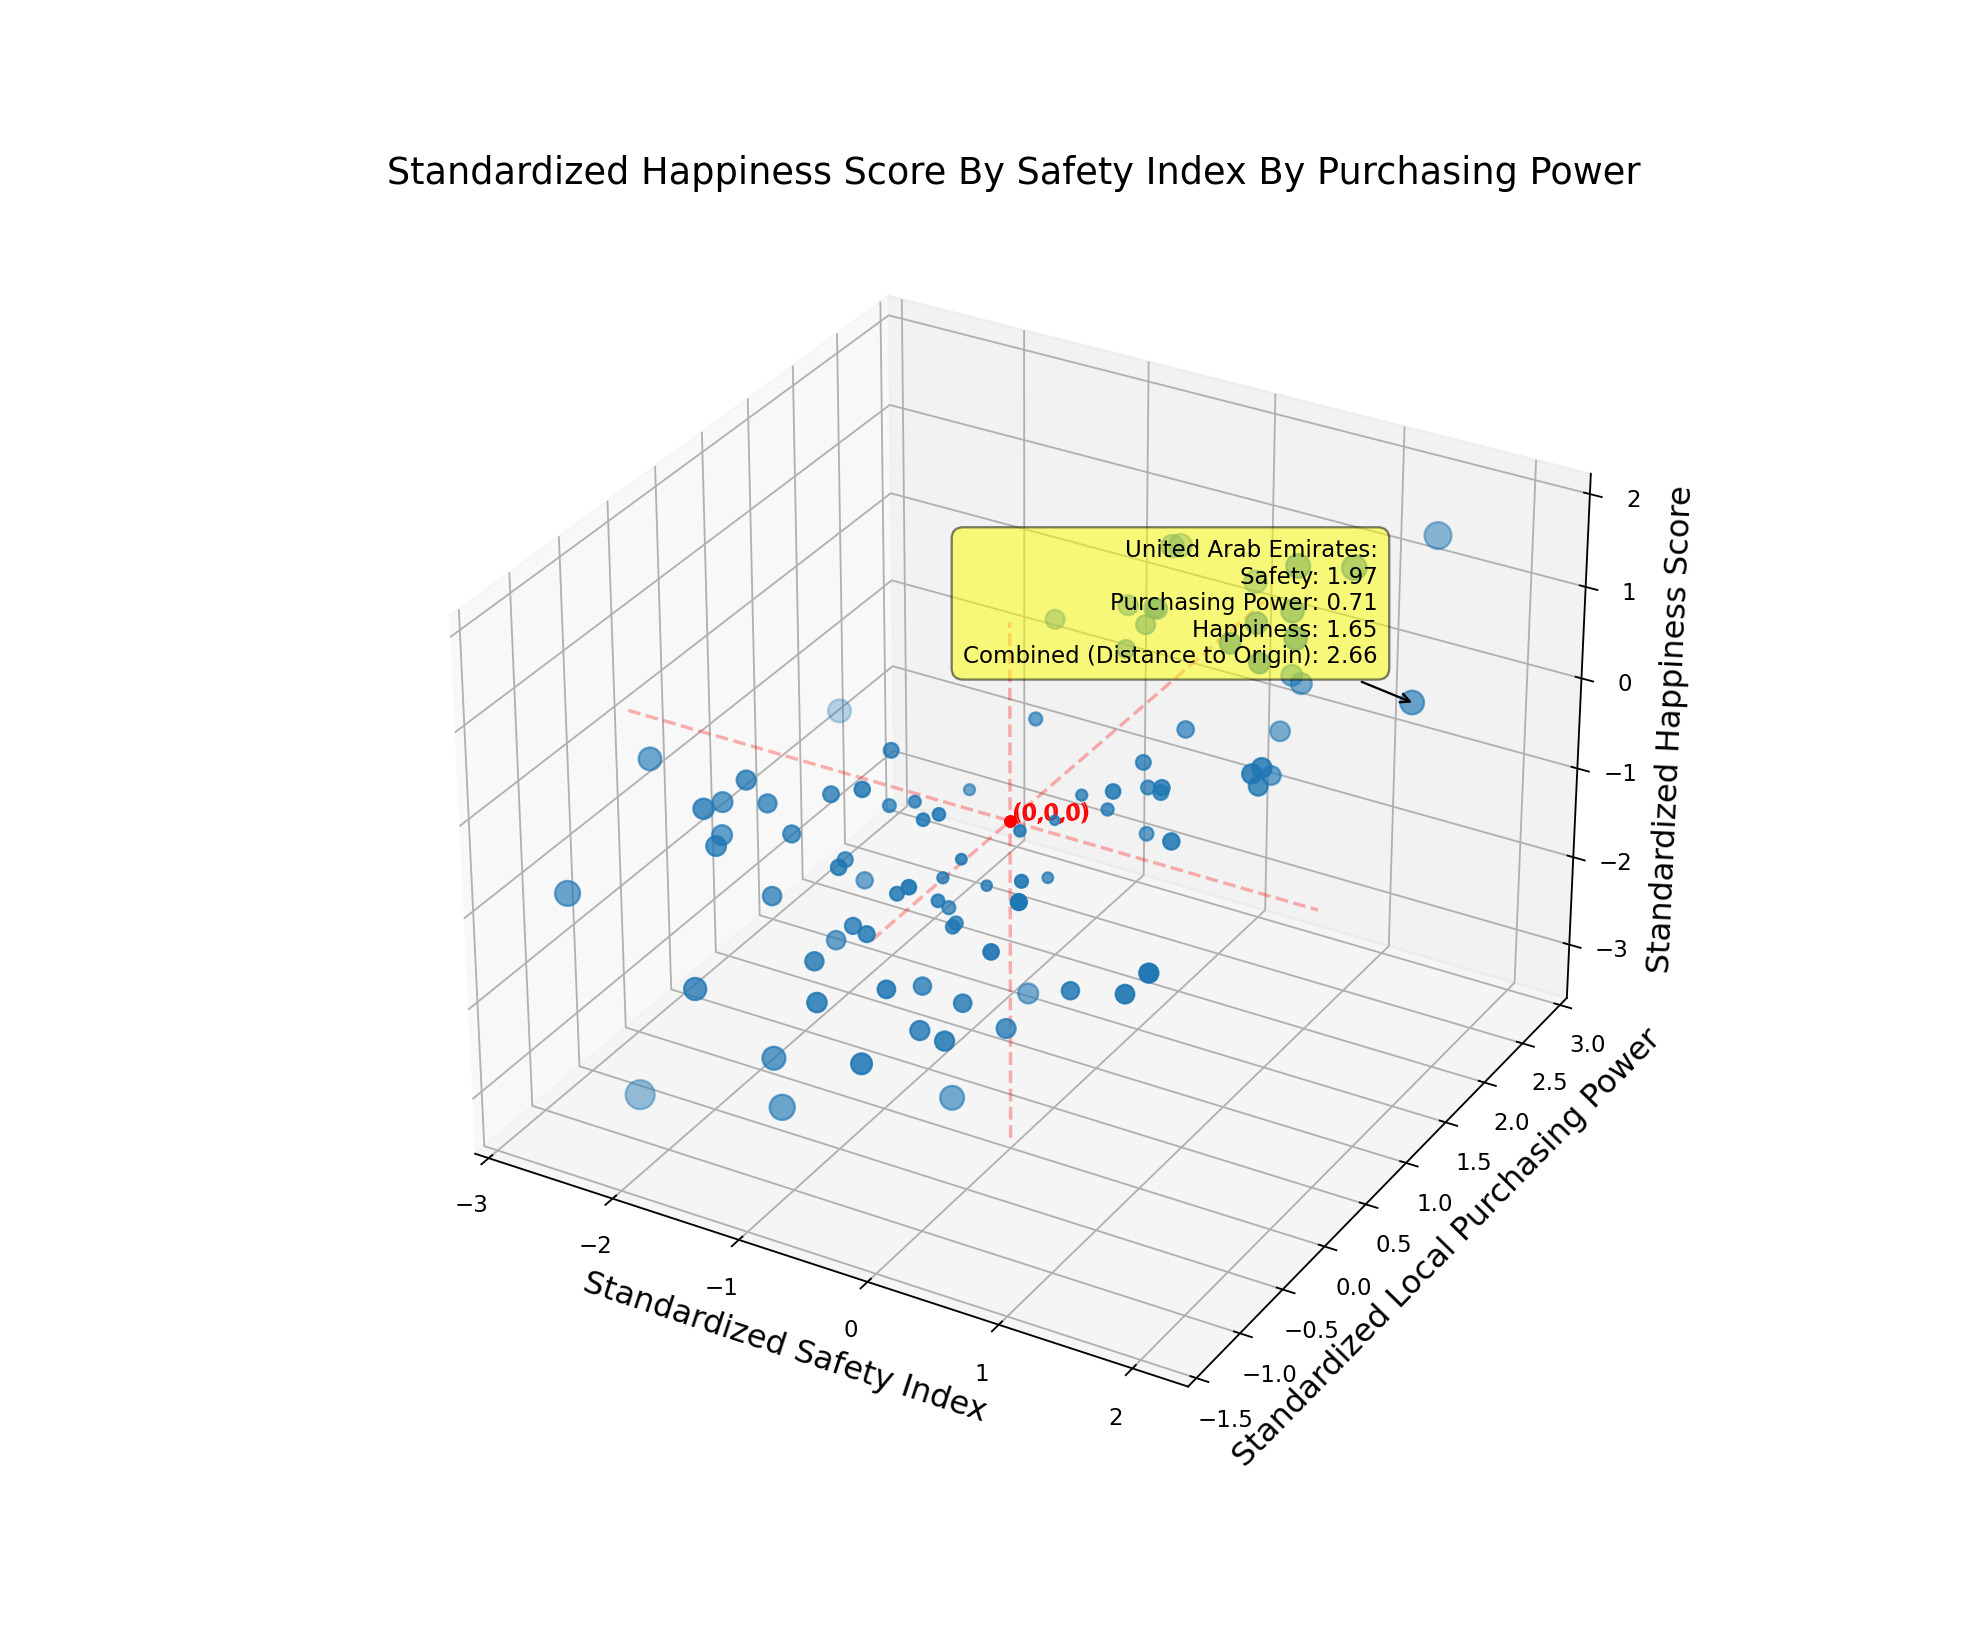

C:\Users\T852\anaconda3\envs\dev\lib\site-packages\mplcursors\_pick_info.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  paths = scatter.__wrapped__(*args, **kwargs)


In [57]:
%matplotlib notebook

# Create weights for combining Z-score Happiness Score, Z-score Local Purchasing Power Index, and Z-score Safety Index into a single value
weightHap = 1
weightPurch = 1
weightSafety = 1

# Create a new column by combining the three metrics (Normalized Happiness, Safety, Purchasing Power) into one metric
HappinessCostOfLivingCrime_df['Equally Weighted Z-Score Safety, Purchasing, and Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Z-Score Safety Index'] * weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Z-Score Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Z-Score Happiness Score'] * weightHap)**2)

# Plot normalized-combined metric 'Equally Weighted Safety, Purchasing, and Happiness'
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# print(HappinessCostOfLivingCrime_df)
# Find min
minimumEquallyWeightedZScore = HappinessCostOfLivingCrime_df['Equally Weighted Z-Score Safety, Purchasing, and Happiness'].min()

visualFactor = 40
x = HappinessCostOfLivingCrime_df['Z-Score Safety Index']
y = HappinessCostOfLivingCrime_df['Z-Score Local Purchasing Power']
z = HappinessCostOfLivingCrime_df['Z-Score Happiness Score']
size = HappinessCostOfLivingCrime_df['Equally Weighted Z-Score Safety, Purchasing, and Happiness']

# Size of datapoint will increase with distance from origin (0,0,0)
fg = ax.scatter3D(x, y, z, s = size * visualFactor, cmap='plasma')

# Labels
ax.set_title('Standardized Happiness Score By Safety Index By Purchasing Power', fontsize=16)
ax.set_xlabel('Standardized Safety Index', fontsize=14)
ax.set_ylabel('Standardized Local Purchasing Power', fontsize=14)
ax.set_zlabel('Standardized Happiness Score', fontsize=14)
ax.scatter3D(0,0,0, color = 'red')
ax.text(0.02,0.02,0, '(0,0,0)', color = 'red')


# Show origin
ax.scatter3D(0,0,0, color = 'red')
ax.text(0.01,0.01,0, '(0,0,0)', color = 'red')
xmin = -3
xmax = 2.3
ymin = -1.5
ymax = 3
zmin = -3.5
zmax = 2.1
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_zlim(zmin,zmax)
plt.plot([xmin, xmax],(0,0),(0,0), color='red', linestyle='dashed', alpha=0.3)
plt.plot((0,0),[ymin, ymax],(0,0), color='red', linestyle='dashed', alpha=0.3)
plt.plot((0,0),(0,0),[zmin, zmax], color='red', linestyle='dashed', alpha=0.3)

# Hover cursor
labels = HappinessCostOfLivingCrime_df['Country']
country = HappinessCostOfLivingCrime_df['Country']
safety = x
happiness = y
purchasingPower = z
combined = size
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set(text = 
    f"{country[sel.target.index]}:\nSafety: {safety[sel.target.index]:.2f}\nPurchasing Power: {purchasingPower[sel.target.index]:.2f}\nHappiness: {happiness[sel.target.index]:.2f}\nCombined (Distance to Origin): {combined[sel.target.index]:.2f}"))

fig1 = plt.gcf()
plt.show()

In [58]:
# Create png name
figureTitle = 'StandardizedHappinessPurchSafety3D8b'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [59]:
# Save dataFrame to csv
HappinessCostOfLivingCrime_df.to_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfZScore.csv')

In [60]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLivingCrime_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfZScore.csv')

In [ ]:
HappinessCostOfLivingCrime_df.sort_values('Z-Score Local Purchasing Power', ascending=False).head(30)

In [ ]:
HappinessCostOfLivingCrime_df.head()

In [ ]:
top10EquallyWeighted = HappinessCostOfLivingCrime_df.sort_values('Equally Weighted Safety, Purchasing, and Happiness', ascending=False).head(10)

In [ ]:
#Equally Weighted
%matplotlib notebook
x = top10EquallyWeighted['Country']
height = top10EquallyWeighted['Equally Weighted Safety, Purchasing, and Happiness']


# collecting countries
countriesOfInterestSet = set()
for q in x:
    countriesOfInterestSet.add(q)
fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Equally Weighted Safety, Purchasing, and Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Normalized Score', fontsize=14)
plt.ylim(2.5, 3)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'EquallyWeightedSafPurchHap9'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 3, purch 2, safety 1
%matplotlib notebook
weightHap = 3
weightPurch = 2
weightSafety = 1
HappinessCostOfLivingCrime_df['Biased Happiness, Purchasing, then Safety'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Happiness, Purchasing, then Safety', 
                                               ascending=False).head(10)
x = top10Bias['Country']
height = top10Bias['Biased Happiness, Purchasing, then Safety']


# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Happiness, Purchasing, then Safety', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Normalized Score', fontsize=14)
plt.ylim(4.4, 4.9)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasHapPurchSaf10'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 3, purch 1, safety 2
%matplotlib notebook
weightHap = 3
weightPurch = 1
weightSafety = 2
HappinessCostOfLivingCrime_df['Biased Happiness, Safety, then Purchasing'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Happiness, Safety, then Purchasing', 
                                               ascending=False).head(10)
# print(top10Bias[['Country','Biased Happiness, Safety, then Purchasing']])
x = top10Bias['Country']
height = top10Bias['Biased Happiness, Safety, then Purchasing']


# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Happiness, Safety, then Purchasing', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Normalized Score', fontsize=14)
plt.ylim(4.7, 5)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasHapSafPurch11'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 2, purch 3, safety 1
%matplotlib notebook
weightHap = 2
weightPurch = 3
weightSafety = 1
HappinessCostOfLivingCrime_df['Biased Purchasing, Happiness, then Safety'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Purchasing, Happiness, then Safety', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Bias['Country']
height = top10Bias['Biased Purchasing, Happiness, then Safety']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Purchasing, Happiness, then Safety', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(3.8, 4.8)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
print(countriesOfInterestSet)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasPurchHapSaf12'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 1, purch 3, safety 2
%matplotlib notebook
weightHap = 1
weightPurch = 3
weightSafety = 2
HappinessCostOfLivingCrime_df['Biased Purchasing, Safety, then Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Purchasing, Safety, then Happiness', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Bias['Country']
height = top10Bias['Biased Purchasing, Safety, then Happiness']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Purchasing, Safety, then Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(3.8, 4.8)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasPurchSafHap13'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 1, purch 2, safety 3
%matplotlib notebook
weightHap = 1
weightPurch = 2
weightSafety = 3
HappinessCostOfLivingCrime_df['Biased Safety, Purchasing, then Happiness'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Safety, Purchasing, then Happiness', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Bias['Country']
height = top10Bias['Biased Safety, Purchasing, then Happiness']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Safety, Purchasing, then Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(4.2, 4.9)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasSafPurchHap14'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 2, purch 1, safety 3
%matplotlib notebook
weightHap = 2
weightPurch = 1
weightSafety = 3
HappinessCostOfLivingCrime_df['Biased Safety, Happiness, then Purchasing'] = np.sqrt((HappinessCostOfLivingCrime_df['Normalized Safety'] + weightSafety)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Local Purchasing Power'] * weightPurch)**2 + 
                            (HappinessCostOfLivingCrime_df['Normalized Happiness'] + weightHap)**2)
top10Bias = HappinessCostOfLivingCrime_df.sort_values('Biased Safety, Happiness, then Purchasing', 
                                               ascending=False).head(10)
# print(HappinessCostOfLivingCrime_df.count())
x = top10Bias['Country']
height = top10Bias['Biased Safety, Happiness, then Purchasing']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Safety, Happiness, then Purchasing', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(4.7, 5)
plt.ylabel('Normalized Score', fontsize=14)
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'BiasSafHapPurch15'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
# Save dataFrame to csv
HappinessCostOfLivingCrime_df.to_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfHist.csv')
# Save countriesOfInterestSet
with open('./Output/CSVSavePoint/countriesOfInterestSet.txt', 'w') as file:
    file.write(str(countriesOfInterestSet).replace("'","").replace("{","").replace("}",""))
countriesOfInterestSet

In [ ]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
HappinessCostOfLivingCrime_df = pd.read_csv('./Output/CSVSavePoint/HappinessCostOfLivingCrime_dfHist.csv')

# Load countriesOfInterestSet
with open('./Output/CSVSavePoint/countriesOfInterestSet.txt', 'r') as file:
    countriesOfInterestSet = set(file.read().replace(", ",",").split(","))   
countriesOfInterestSet


In [ ]:
# Loading the gdp_df dataframe
gdp_df = pd.read_csv('./Resources/RealGDPGrowthfrom1980across2022.csv', encoding='latin-1')
gdp_df = gdp_df.replace('no data', pd.NA)

# Replacing NANs with 0
fgdp_df = gdp_df.fillna(0)
fgdp_df.head()

In [ ]:
# Sorting countriesOfInterestSet
countriesOfInterestSet = sorted(countriesOfInterestSet)

# Plotting countriesOfInterestSet by GDP
fig, ax = plt.subplots(figsize=(12,10))

fl_fgdp_df = fgdp_df.iloc[:,1:].astype('float')

count = 0
countifs = 0

for x in fgdp_df['Country']:
    if x in countriesOfInterestSet:
        countifs += 1
        ax.scatter(fgdp_df.columns[1:], fl_fgdp_df.iloc[count].tolist(), label=x, zorder = 3)
    count += 1

plt.subplots_adjust(left=0.1)
plt.title('GDP Of Top 16 Countries Over Time', fontsize=16)
plt.xticks(fgdp_df.columns[1:][::5])
plt.yticks(range(-25, 30, 10))
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Gross Domestic Product (USD)', fontsize = 16)
plt.legend(loc=(0.92, 0))
plt.grid(zorder=0)
fig1 = plt.gcf()
plt.show()

In [ ]:
# Create png name
figureTitle = 'GDPTop16_16'

# Save the figure
fig1.savefig(f"Output/{figureTitle}.png")

In [ ]:
# Save dataFrame to csv
fl_fgdp_df.to_csv('./Output/CSVSavePoint/fl_fgdp_df.csv')

In [ ]:
#********************************************
# Create a dataframe loading point in order to skip steps in the event of having to restart the kernel
fl_fgdp_df = pd.read_csv('./Output/CSVSavePoint/fl_fgdp_df.csv')

# Load countriesOfInterestSet
with open('./Output/CSVSavePoint/countriesOfInterestSet.txt', 'r') as file:
    countriesOfInterestSet = set(file.read().replace(", ",",").split(","))   
countriesOfInterestSet

In [ ]:
rolling_df = fl_fgdp_df.rolling(window=5).mean()
fig, ax = plt.subplots(figsize=(12,10))

count = 0
countifs = 0

for x in rolling_df['Country']:
    if x in countriesOfInterestSet:
        countifs += 1
        ax.plot(rolling_df.columns[1:], rolling_df.iloc[count].tolist(), label=x)
    count += 1
plt.subplots_adjust(left=0.1)
plt.title('GDP Of Top 16 Countries Over Time', fontsize=16)
plt.xticks(fgdp_df.columns[1:][::5])
plt.yticks(range(-25, 30, 10))
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Gross Domestic Product (USD)', fontsize = 16)
plt.legend(loc=(0.95, 0))
